In [1]:
import numpy as np
import pandas as pd
import json

pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:

with open('LLQT.json','r') as json_data:
    data_quiz = json.load(json_data)

with open('rJvd7g.json','r') as json_data:
    data_response = json.load(json_data)

with open('XgAgFJ.json','r') as json_data:
    data_history = json.load(json_data)

In [3]:

normalised_data = pd.json_normalize(data_history,max_level=0)
df_history  = pd.DataFrame(normalised_data)

df_history.head()

,id,quiz_id,user_id,submitted_at,created_at,updated_at,score,trophy_level,accuracy,speed,final_score,negative_score,correct_answers,incorrect_answers,source,type,started_at,ended_at,duration,better_than,total_questions,rank_text,mistakes_corrected,initial_mistake_count,response_map,quiz
0,336497,51,YcDFSO4ZukTJnnFMgRNVwZTE4j42,2025-01-17T15:30:18.027+05:30,2025-01-17T15:30:18.044+05:30,2025-01-17T15:30:18.044+05:30,108,2,90 %,100,105.0,3.0,27,3,exam,topic,2025-01-17T15:18:30.000+05:30,2025-01-17T15:30:15.000+05:30,15:00,107,100,Topic Rank - #-171,9,12,"{'2523': 10109, '2529': 10130, '2533': 10149, ...","{'id': 51, 'name': None, 'title': 'Human Physi..."
1,336448,6,YcDFSO4ZukTJnnFMgRNVwZTE4j42,2025-01-17T15:17:44.042+05:30,2025-01-17T15:17:44.056+05:30,2025-01-17T15:17:44.056+05:30,92,1,100 %,100,92.0,0.0,23,0,exam,topic,2025-01-17T15:07:45.000+05:30,2025-01-17T15:17:41.000+05:30,15:00,395,23,Topic Rank - #-9140,3,3,"{'48': 192, '49': 197, '50': 199, '51': 203, '...","{'id': 6, 'name': None, 'title': 'Human Physio..."
2,333330,51,YcDFSO4ZukTJnnFMgRNVwZTE4j42,2025-01-16T20:13:19.682+05:30,2025-01-16T20:13:19.699+05:30,2025-01-16T20:13:19.699+05:30,116,2,96 %,100,115.0,1.0,29,1,live,topic,2025-01-16T20:01:10.000+05:30,2025-01-16T20:13:18.000+05:30,15:00,115,100,Topic Rank - #-418,11,12,"{'2523': 10109, '2525': 10117, '2528': 10127, ...","{'id': 51, 'name': None, 'title': 'Human Physi..."
3,333242,6,YcDFSO4ZukTJnnFMgRNVwZTE4j42,2025-01-16T20:00:11.562+05:30,2025-01-16T20:00:11.573+05:30,2025-01-16T20:00:11.573+05:30,36,2,90 %,100,35.0,1.0,9,1,live,topic,2025-01-16T19:52:57.000+05:30,2025-01-16T20:00:09.000+05:30,15:00,152,23,Topic Rank - #-1598,1,2,"{'49': 197, '52': 208, '53': 212, '54': 217, '...","{'id': 6, 'name': None, 'title': 'Human Physio..."
4,329504,51,YcDFSO4ZukTJnnFMgRNVwZTE4j42,2025-01-15T20:34:39.462+05:30,2025-01-15T20:34:39.478+05:30,2025-01-15T20:34:39.478+05:30,36,3,31 %,96,16.0,20.0,9,20,exam,topic,2025-01-15T20:21:25.000+05:30,2025-01-15T20:34:38.000+05:30,15:00,35,100,Topic Rank - #2023,0,20,"{'2521': 10099, '2523': 10107, '2532': 10145, ...","{'id': 51, 'name': None, 'title': 'Human Physi..."


In [4]:
df_history_1 = df_history.copy()

#extracting quiz topic and title
df_history_1['quiz_topic']=h = pd.DataFrame([" ".join(df_history_1['quiz'][_]['topic'].lower().split()) for _ in df_history_1.index])
df_history_1['quiz_title'] = pd.DataFrame([df_history_1['quiz'][_]['title'] for _ in df_history_1.index])

#extracting submission time, and total time taken to finish the quiz ('total_duration')
df_history_1['submitted_at'] = pd.to_datetime(df_history_1['submitted_at'])
df_history_1['started_at'] = pd.to_datetime(df_history_1['started_at'])
df_history_1['ended_at'] = pd.to_datetime(df_history_1['ended_at'])

df_history_1['total_duration'] = df_history_1['ended_at']-df_history_1['started_at']
df_history_1['total_duration_seconds'] = [_.total_seconds() for _ in df_history_1['total_duration']]

#extracting and formatting 'accuracy' 
df_history_1['accuracy'] = [int(_.strip("% "))for _ in df_history_1['accuracy']]

#extracting and formatting 'rank' 
df_history_1['Rank']= [int(_.strip("Topic Rank - #-"))for _ in df_history_1['rank_text']]
df_history_1['Rank Type'] = [_.strip("1234567890- #-") for _ in df_history_1['rank_text']]

# formatting speed and final_score
df_history_1['speed']=[int(_) for _ in df_history_1['speed']]
df_history_1['final_score']=[float(_) for _ in df_history_1['final_score']]

#total questions answered:
df_history_1['total_questions_answered'] = (df_history_1['correct_answers'] + df_history_1['incorrect_answers'])


#percent of questions answered
df_history_1['questions_answered_percent'] = 100*(df_history_1['correct_answers'] + df_history_1['incorrect_answers'])/df_history_1['total_questions']



#percent of questions answered correctly 
df_history_1['correct_answers_percent'] = 100*(df_history_1['correct_answers']/df_history_1['total_questions_answered'])

#percent of questions answered incorrectly
df_history_1['incorrect_answers_percent'] = 100*(df_history_1['incorrect_answers']/df_history_1['total_questions_answered'])




#percentage of initial mistakes out of total answers
#best : this number must be low
df_history_1['initial_mistake_percent'] =  100*(df_history_1['initial_mistake_count']/df_history_1['total_questions_answered'])

#percentage of mistakes that were corrected out of total mistakes
#best : this number must be high 
df_history_1['corrected_mistake_percent'] =  100*(df_history_1['mistakes_corrected']/df_history_1['initial_mistake_count'])


df_history_1

,id,quiz_id,user_id,submitted_at,created_at,updated_at,score,trophy_level,accuracy,speed,final_score,negative_score,correct_answers,incorrect_answers,source,type,started_at,ended_at,duration,better_than,total_questions,rank_text,mistakes_corrected,initial_mistake_count,response_map,quiz,quiz_topic,quiz_title,total_duration,total_duration_seconds,Rank,Rank Type,total_questions_answered,questions_answered_percent,correct_answers_percent,incorrect_answers_percent,initial_mistake_percent,corrected_mistake_percent
0,336497,51,YcDFSO4ZukTJnnFMgRNVwZTE4j42,2025-01-17 15:30:18.027000+05:30,2025-01-17T15:30:18.044+05:30,2025-01-17T15:30:18.044+05:30,108,2,90,100,105.0,3.0,27,3,exam,topic,2025-01-17 15:18:30+05:30,2025-01-17 15:30:15+05:30,15:00,107,100,Topic Rank - #-171,9,12,"{'2523': 10109, '2529': 10130, '2533': 10149, ...","{'id': 51, 'name': None, 'title': 'Human Physi...",body fluids and circulation,Human Physiology (15),0 days 00:11:45,705.0,171,Topic Rank,30,30.000000,90.000000,10.000000,40.000000,75.000000
1,336448,6,YcDFSO4ZukTJnnFMgRNVwZTE4j42,2025-01-17 15:17:44.042000+05:30,2025-01-17T15:17:44.056+05:30,2025-01-17T15:17:44.056+05:30,92,1,100,100,92.0,0.0,23,0,exam,topic,2025-01-17 15:07:45+05:30,2025-01-17 15:17:41+05:30,15:00,395,23,Topic Rank - #-9140,3,3,"{'48': 192, '49': 197, '50': 199, '51': 203, '...","{'id': 6, 'name': None, 'title': 'Human Physio...",body fluids and circulation,Human Physiology PYQ,0 days 00:09:56,596.0,9140,Topic Rank,23,100.000000,100.000000,0.000000,13.043478,100.000000
2,333330,51,YcDFSO4ZukTJnnFMgRNVwZTE4j42,2025-01-16 20:13:19.682000+05:30,2025-01-16T20:13:19.699+05:30,2025-01-16T20:13:19.699+05:30,116,2,96,100,115.0,1.0,29,1,live,topic,2025-01-16 20:01:10+05:30,2025-01-16 20:13:18+05:30,15:00,115,100,Topic Rank - #-418,11,12,"{'2523': 10109, '2525': 10117, '2528': 10127, ...","{'id': 51, 'name': None, 'title': 'Human Physi...",body fluids and circulation,Human Physiology (15),0 days 00:12:08,728.0,418,Topic Rank,30,30.000000,96.666667,3.333333,40.000000,91.666667
3,333242,6,YcDFSO4ZukTJnnFMgRNVwZTE4j42,2025-01-16 20:00:11.562000+05:30,2025-01-16T20:00:11.573+05:30,2025-01-16T20:00:11.573+05:30,36,2,90,100,35.0,1.0,9,1,live,topic,2025-01-16 19:52:57+05:30,2025-01-16 20:00:09+05:30,15:00,152,23,Topic Rank - #-1598,1,2,"{'49': 197, '52': 208, '53': 212, '54': 217, '...","{'id': 6, 'name': None, 'title': 'Human Physio...",body fluids and circulation,Human Physiology PYQ,0 days 00:07:12,432.0,1598,Topic Rank,10,43.478261,90.000000,10.000000,20.000000,50.000000
4,329504,51,YcDFSO4ZukTJnnFMgRNVwZTE4j42,2025-01-15 20:34:39.462000+05:30,2025-01-15T20:34:39.478+05:30,2025-01-15T20:34:39.478+05:30,36,3,31,96,16.0,20.0,9,20,exam,topic,2025-01-15 20:21:25+05:30,2025-01-15 20:34:38+05:30,15:00,35,100,Topic Rank - #2023,0,20,"{'2521': 10099, '2523': 10107, '2532': 10145, ...","{'id': 51, 'name': None, 'title': 'Human Physi...",body fluids and circulation,Human Physiology (15),0 days 00:13:13,793.0,2023,Topic Rank,29,29.000000,31.034483,68.965517,68.965517,0.000000
5,328488,57,YcDFSO4ZukTJnnFMgRNVwZTE4j42,2025-01-15 15:57:12.791000+05:30,2025-01-15T15:57:12.800+05:30,2025-01-15T15:57:12.800+05:30,40,3,38,86,24.0,16.0,10,16,exam,topic,2025-01-15 15:47:05+05:30,2025-01-15 15:57:11+05:30,15:00,43,89,Topic Rank - #1810,0,16,"{'3043': 12184, '3044': 12186, '3046': 12194, ...","{'id': 57, 'name': None, 'title': 'Reproductio...",human reproduction,Reproduction,0 days 00:10:06,606.0,1810,Topic Rank,26,29.213483,38.461538,61.538462,61.538462,0.000000
6,328414,6,YcDFSO4ZukTJnnFMgRNVwZTE4j42,2025-01-15 15:36:46.410000+05:30,2025-01-15T15:36:46.420+05:30,2025-01-15T15:36:46.420+05:30,36,3,50,78,27.0,9.0,9,9,exam,topic,2025-01-15 15:23:42+05:30,2025-01-15 15:36:45+05:30,15:00,152,23,Topic Rank - #-1598,0,9,"{'48': 193, '49': 197, '50': 202, '51': 203, '...","{'id': 6, 'name': None, 'title': 'Human Physio...",body fluids and circulation,Human Physiology PYQ,0 days 00:13:03,783.0,1598,Topic Rank,18,78.260870,50.000000,50

In [5]:
#looking for null counts:
df_history_1.isna().sum()

id                            0
quiz_id                       0
user_id                       0
submitted_at                  0
created_at                    0
updated_at                    0
score                         0
trophy_level                  0
accuracy                      0
speed                         0
final_score                   0
negative_score                0
correct_answers               0
incorrect_answers             0
source                        0
type                          0
started_at                    0
ended_at                      0
duration                      0
better_than                   0
total_questions               0
rank_text                     0
mistakes_corrected            0
initial_mistake_count         0
response_map                  0
quiz                          0
quiz_topic                    0
quiz_title                    0
total_duration                0
total_duration_seconds        0
Rank                          0
Rank Typ

- one null value found

In [6]:
df_history_1[df_history_1.isna().any(axis=1)==True]

,id,quiz_id,user_id,submitted_at,created_at,updated_at,score,trophy_level,accuracy,speed,final_score,negative_score,correct_answers,incorrect_answers,source,type,started_at,ended_at,duration,better_than,total_questions,rank_text,mistakes_corrected,initial_mistake_count,response_map,quiz,quiz_topic,quiz_title,total_duration,total_duration_seconds,Rank,Rank Type,total_questions_answered,questions_answered_percent,correct_answers_percent,incorrect_answers_percent,initial_mistake_percent,corrected_mistake_percent
9,320916,18,YcDFSO4ZukTJnnFMgRNVwZTE4j42,2025-01-13 13:12:40.687000+05:30,2025-01-13T13:12:40.695+05:30,2025-01-13T13:12:40.695+05:30,40,1,100,100,40.0,0.0,10,0,live,topic,2025-01-13 13:11:13+05:30,2025-01-13 13:12:39+05:30,15:00,177,22,Topic Rank - #-2380,0,0,"{'612': 2451, '613': 2454, '614': 2460, '619':...","{'id': 18, 'name': None, 'title': 'REPRODUCTIV...",reproductive health,REPRODUCTIVE HEALTH PYQ,0 days 00:01:26,86.0,2380,Topic Rank,10,45.454545,100.0,0.0,0.0,NaN


In [7]:
# Reassigning values to null 
df_history_1.iloc[df_history_1[df_history_1.isna().any(axis=1)==True].index,-1] = 0

In [8]:
df_history_1.isna().any().sum()

0

In [9]:
df_history_1[df_history_1.isna().any(axis=1)==True]

,id,quiz_id,user_id,submitted_at,created_at,updated_at,score,trophy_level,accuracy,speed,final_score,negative_score,correct_answers,incorrect_answers,source,type,started_at,ended_at,duration,better_than,total_questions,rank_text,mistakes_corrected,initial_mistake_count,response_map,quiz,quiz_topic,quiz_title,total_duration,total_duration_seconds,Rank,Rank Type,total_questions_answered,questions_answered_percent,correct_answers_percent,incorrect_answers_percent,initial_mistake_percent,corrected_mistake_percent


In [10]:
df_history_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 38 columns):
 #   Column                      Non-Null Count  Dtype                    
---  ------                      --------------  -----                    
 0   id                          14 non-null     int64                    
 1   quiz_id                     14 non-null     int64                    
 2   user_id                     14 non-null     object                   
 3   submitted_at                14 non-null     datetime64[ns, UTC+05:30]
 4   created_at                  14 non-null     object                   
 5   updated_at                  14 non-null     object                   
 6   score                       14 non-null     int64                    
 7   trophy_level                14 non-null     int64                    
 8   accuracy                    14 non-null     int64                    
 9   speed                       14 non-null     int64                  

In [11]:
df_history_1.describe()

,id,quiz_id,score,trophy_level,accuracy,speed,final_score,correct_answers,incorrect_answers,better_than,total_questions,mistakes_corrected,initial_mistake_count,total_duration,total_duration_seconds,Rank,total_questions_answered,questions_answered_percent,correct_answers_percent,incorrect_answers_percent,initial_mistake_percent,corrected_mistake_percent
count,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.00000,14.000000,14.000000,14,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,312368.428571,31.500000,60.285714,2.214286,72.214286,95.071429,54.428571,15.071429,5.857143,160.000000,55.50000,2.857143,8.714286,0 days 00:10:02.071428571,602.071429,3131.785714,20.928571,51.459724,72.407611,27.592389,38.361159,35.884354
std,38889.139814,20.346045,34.675260,0.699293,27.904173,7.216054,38.142878,8.668815,6.948792,126.353594,35.01593,4.452435,6.462062,0 days 00:04:31.868595036,271.868595,2898.665746,8.507592,29.978628,27.889274,27.889274,22.020582,44.589668
min,195808.000000,6.000000,12.000000,1.000000,30.000000,78.000000,5.000000,3.000000,0.000000,18.000000,20.00000,0.000000,0.000000,0 days 00:01:26,86.000000,171.000000,9.000000,9.000000,30.000000,0.000000,0.000000,0.000000
25%,316613.250000,18.000000,36.000000,2.000000,44.750000,91.250000,24.750000,9.000000,1.000000,55.250000,23.00000,0.000000,3.000000,0 days 00:05:59.250000,359.250000,1598.000000,12.000000,29.410112,45.000000,4.166667,20.263158,0.000000
50%,324964.000000,24.500000,46.000000,2.000000,87.000000,100.000000,37.500000,11.500000,3.000000,133.500000,48.00000,0.000000,8.000000,0 days 00:10:55.500000,655.500000,2201.500000,21.000000,44.466403,87.105263,12.894737,40.000000,0.000000
75%,332307.500000,51.000000,88.000000,3.000000,95.250000,100.000000,88.000000,22.000000,8.500000,246.750000,97.25000,3.750000,13.500000,0 days 00:13:10.500000,790.500000,4550.250000,29.750000,76.988335,95.833333,55.000000,55.000000,83.035714
max,336497.000000,58.000000,116.000000,3.000000,100.000000,100.000000,115.000000,29.000000,20.000000,395.000000,100.00000,12.000000,20.000000,0 days 00:16:23,983.000000,9140.000000,30.000000,100.000000,100.000000,70.000000,70.000000,100.000000


In [12]:
# list of columns :
df_history_1.columns

Index(['id', 'quiz_id', 'user_id', 'submitted_at', 'created_at', 'updated_at',
       'score', 'trophy_level', 'accuracy', 'speed', 'final_score',
       'negative_score', 'correct_answers', 'incorrect_answers', 'source',
       'type', 'started_at', 'ended_at', 'duration', 'better_than',
       'total_questions', 'rank_text', 'mistakes_corrected',
       'initial_mistake_count', 'response_map', 'quiz', 'quiz_topic',
       'quiz_title', 'total_duration', 'total_duration_seconds', 'Rank',
       'Rank Type', 'total_questions_answered', 'questions_answered_percent',
       'correct_answers_percent', 'incorrect_answers_percent',
       'initial_mistake_percent', 'corrected_mistake_percent'],
      dtype='object')

### Distribution of rank vs total number of questions

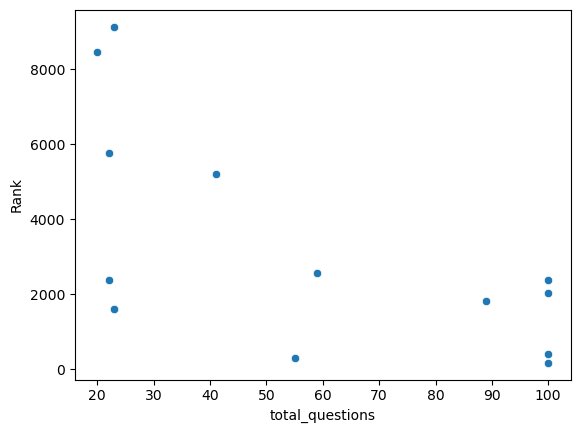

In [13]:
sns.scatterplot(y= df_history_1['Rank'],
                x=df_history_1['total_questions']
               )
plt.show()

#### it seems that for a higher number of questions (>50), the rank is generally better.

### Distribution of rank vs total number of questions answered

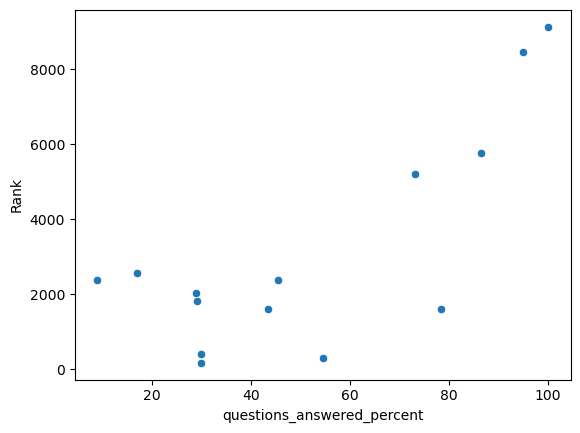

In [244]:
sns.scatterplot(y= df_history_1['Rank'],
                x=df_history_1['questions_answered_percent']
               )
plt.show()


#### it seems that answering <50% questions still gets a rank < 2000.
- this can be because other students are answering wrongly even when attempting more questions
- or, other students are attempting even lesser questions than this candidate

### Rank vs Accuracy

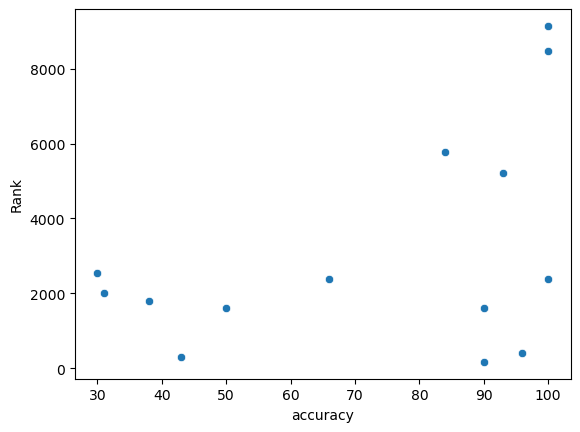

In [30]:
sns.scatterplot(y= df_history_1['Rank'],
                x=df_history_1['accuracy']
               )
plt.show()

#### Even at lower accuracies, the rank seems constant.

### Rank vs Speed

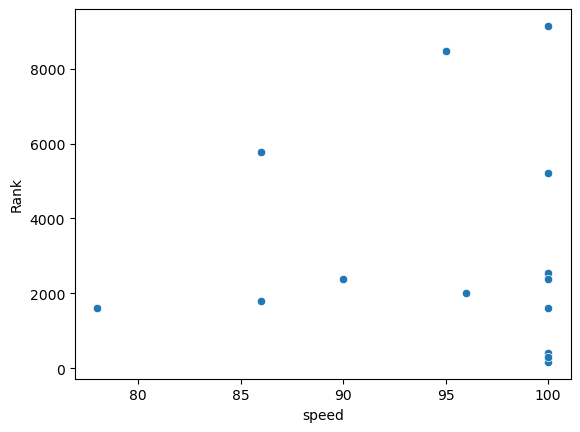

In [268]:
sns.scatterplot(y= df_history_1['Rank'],
                x=df_history_1['speed']
               )
plt.show()

#### rank seems to be unaffected by speed at speed 100, constant at speeds >80 and <100

### Rank vs total duration

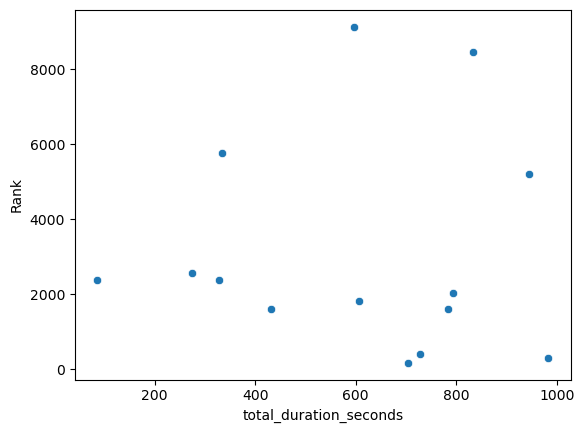

In [54]:
sns.scatterplot(y= df_history_1['Rank'],
                x=df_history_1['total_duration_seconds']
               )

plt.show()

#### Rank seems reduce as duration increases

### Rank vs total duration and quiz topics

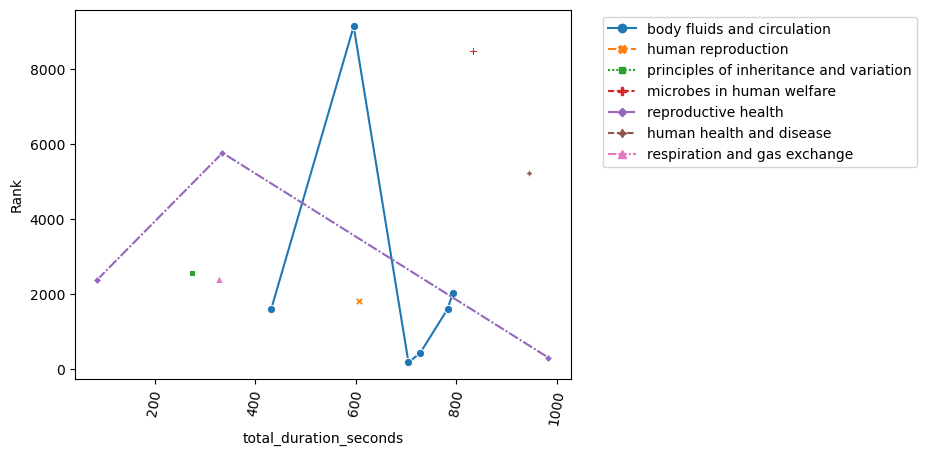

In [219]:


sns.lineplot(y=df_history_1.Rank,
             x=df_history_1.total_duration_seconds,
             style=df_history_1.quiz_topic,
             hue=df_history_1.quiz_topic,
             
            markers=True, #, dashes=False
            )

plt.xticks(rotation = 80)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

### Rank vs initial mistakes percent

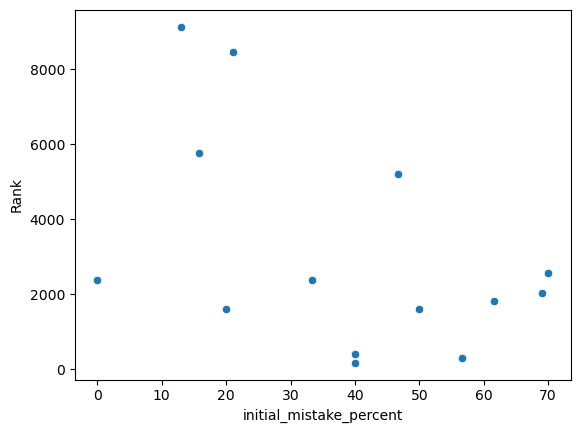

In [67]:
sns.scatterplot(y= df_history_1['Rank'],
                x=df_history_1['initial_mistake_percent']
               )

plt.show()

#### rank seems somewhat constant with initial mistakes, this can be due to following reasons :
- These mistakes are made by most students
- or, most mistakes were corrected 

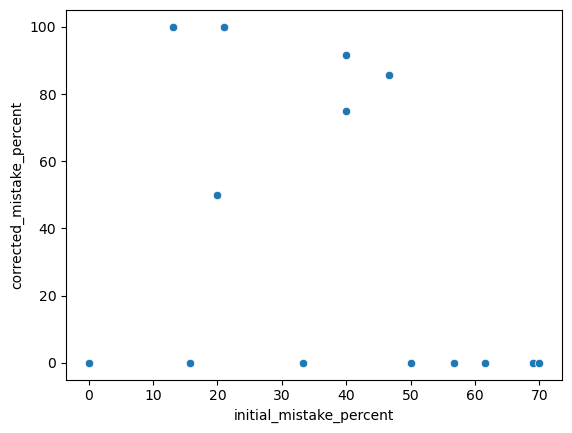

In [282]:
sns.scatterplot(y= df_history_1['corrected_mistake_percent'],
                x=df_history_1['initial_mistake_percent']
               )

plt.show()

### Rank progression with time

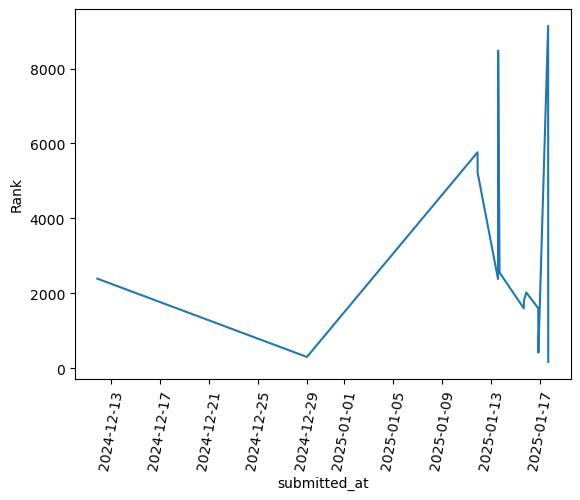

In [286]:
#rank
sns.lineplot(y=df_history_1['Rank'],
             x=df_history_1.submitted_at,

             
            markers=True, #, dashes=False
            )

plt.xticks(rotation = 80)

plt.show()

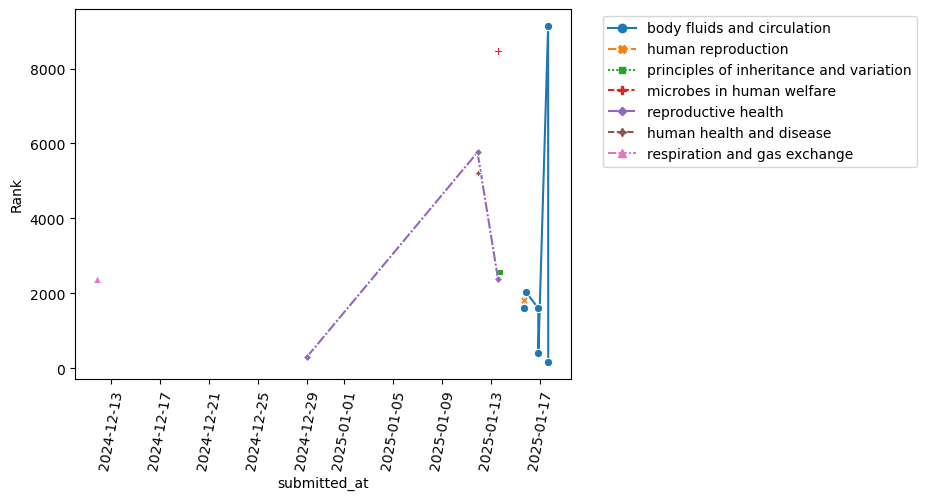

In [213]:
#rank
sns.lineplot(y=df_history_1['Rank'],
             x=df_history_1.submitted_at,
             style=df_history_1.quiz_topic,
             hue=df_history_1.quiz_topic,
             
            markers=True, #, dashes=False
            )

plt.xticks(rotation = 80)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Quizes attemped per topic

In [191]:
# quizes attemped by topic

df_history_1[['quiz_topic']].value_counts()

quiz_topic                             
body fluids and circulation                6
reproductive health                        3
human health and disease                   1
human reproduction                         1
microbes in human welfare                  1
principles of inheritance and variation    1
respiration and gas exchange               1
Name: count, dtype: int64

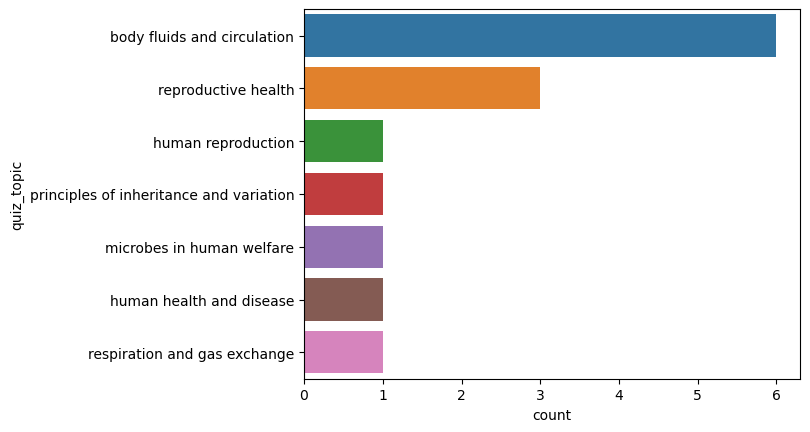

In [199]:

sns.barplot(
    x = df_history_1['quiz_topic'].value_counts(),
    y= df_history_1['quiz_topic'].value_counts().index,
            )
plt.show()

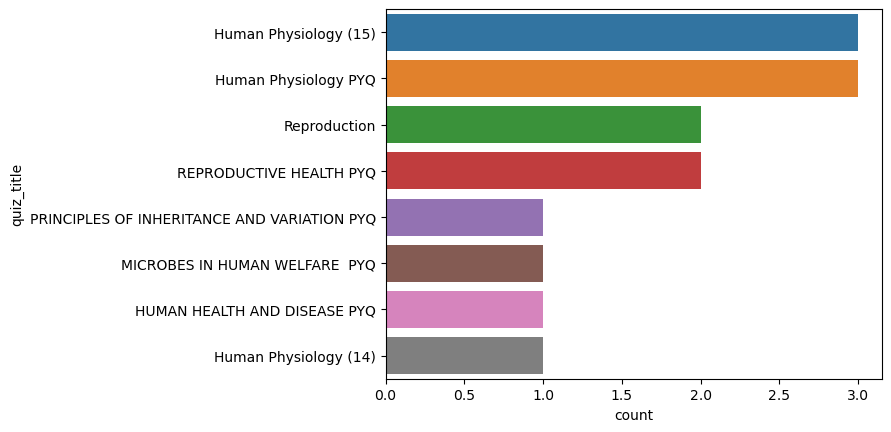

In [201]:
sns.barplot(
    x = df_history_1['quiz_title'].value_counts(),
    y= df_history_1['quiz_title'].value_counts().index,
    
            )
plt.show()

### Accuracy on first attempt per topic

In [203]:
df_history_first_attempt = pd.DataFrame(df_history_1.groupby(['quiz_id','quiz_topic']).agg({'submitted_at':'min'}).sort_values(by=['quiz_id','quiz_topic','submitted_at']))
df_history_first_attempt.head(10)

pd.merge(df_history_first_attempt,df_history_1, on=['quiz_id','quiz_topic','submitted_at'])[['quiz_id','quiz_topic','submitted_at','accuracy']]

,quiz_id,quiz_topic,submitted_at,accuracy
0,6,body fluids and circulation,2025-01-15 15:36:46.410000+05:30,50
1,18,reproductive health,2025-01-11 21:03:43.251000+05:30,84
2,20,principles of inheritance and variation,2025-01-13 16:10:03.743000+05:30,30
3,24,microbes in human welfare,2025-01-13 13:28:12.784000+05:30,100
4,25,human health and disease,2025-01-11 21:20:08.641000+05:30,93
5,50,respiration and gas exchange,2024-12-11 20:36:44.822000+05:30,66
6,51,body fluids and circulation,2025-01-15 20:34:39.462000+05:30,31
7,57,human reproduction,2025-01-15 15:57:12.791000+05:30,38
8,58,reproductive health,2024-12-28 22:58:52.969000+05:30,43


### Distribution of accuracy :

In [210]:
df_history_1.groupby(['quiz_id','quiz_topic','submitted_at']).agg({'accuracy':'mean'}).sort_values(by=['quiz_id','quiz_topic','submitted_at'])

accuracy
quiz_id quiz_topic                              submitted_at                              
6       body fluids and circulation             2025-01-15 15:36:46.410000+05:30      50.0
                                                2025-01-16 20:00:11.562000+05:30      90.0
                                                2025-01-17 15:17:44.042000+05:30     100.0
18      reproductive health                     2025-01-11 21:03:43.251000+05:30      84.0
                                                2025-01-13 13:12:40.687000+05:30     100.0
20      principles of inheritance and variation 2025-01-13 16:10:03.743000+05:30      30.0
24      microbes in human welfare               2025-01-13 13:28:12.784000+05:30     100.0
25      human health and disease                2025-01-11 21:20:08.641000+05:30      93.0
50      respiration and gas exchange            2024-12-11 20:36:44.822000+05:30      66.0
51      body fluids and circulation             2025-01-15 20:34:39.462000+05:30      31.0
                                                2025-01-16 20:13:19.682000+05:30      96.0
                                                2025-01-17 15:30:18.027000+05:30      90.0
57      human reproduction                      2025-01-15 15:57:12.791000+05:30      38.0
58      reproductive health                     2024-12-28 22:58:52.969000+05:30      43.0

In [288]:
data_response

{'id': 336566,
 'quiz_id': 43,
 'user_id': '7ZXdz3zHuNcdg9agb5YpaOGLQqw2',
 'submitted_at': '2025-01-17T15:51:29.859+05:30',
 'created_at': '2025-01-17T15:51:29.871+05:30',
 'updated_at': '2025-01-17T15:51:29.871+05:30',
 'score': 32,
 'trophy_level': 2,
 'accuracy': '80 %',
 'speed': '100',
 'final_score': '30.0',
 'negative_score': '2.0',
 'correct_answers': 8,
 'incorrect_answers': 2,
 'source': 'live',
 'type': 'topic',
 'started_at': '2025-01-17T16:20:44.000+05:30',
 'ended_at': '2025-01-17T16:21:28.000+05:30',
 'duration': '15:00',
 'better_than': 24,
 'total_questions': 128,
 'rank_text': 'Topic Rank - #2402',
 'mistakes_corrected': 6,
 'initial_mistake_count': 8,
 'response_map': {'1837': 7363,
  '1848': 7407,
  '1852': 7423,
  '1862': 7464,
  '1877': 7525,
  '1878': 7529,
  '1900': 7617,
  '1917': 7685,
  '1934': 7750,
  '1964': 7872},
 'quiz': {'id': 43,
  'name': None,
  'title': 'Structural Organisation in Animals and Plants (7)',
  'description': '',
  'difficulty_level': 

In [292]:

normalised_data = pd.json_normalize(data_response,max_level=0)
df_response  = pd.DataFrame(normalised_data)

df_response.head()


df_response_1 = df_response.copy()

#extracting quiz topic and title
df_response_1['quiz_topic']=h = pd.DataFrame([" ".join(df_response_1['quiz'][_]['topic'].lower().split()) for _ in df_response_1.index])
df_response_1['quiz_title'] = pd.DataFrame([df_response_1['quiz'][_]['title'] for _ in df_response_1.index])

#extracting submission time, and total time taken to finish the quiz ('total_duration')
df_response_1['submitted_at'] = pd.to_datetime(df_response_1['submitted_at'])
df_response_1['started_at'] = pd.to_datetime(df_response_1['started_at'])
df_response_1['ended_at'] = pd.to_datetime(df_response_1['ended_at'])

df_response_1['total_duration'] = df_response_1['ended_at']-df_response_1['started_at']
df_response_1['total_duration_seconds'] = [_.total_seconds() for _ in df_response_1['total_duration']]

#extracting and formatting 'accuracy' 
df_response_1['accuracy'] = [int(_.strip("% "))for _ in df_response_1['accuracy']]

#extracting and formatting 'rank' 
df_response_1['Rank']= [int(_.strip("Topic Rank - #-"))for _ in df_response_1['rank_text']]
df_response_1['Rank Type'] = [_.strip("1234567890- #-") for _ in df_response_1['rank_text']]

# formatting speed and final_score
df_response_1['speed']=[int(_) for _ in df_response_1['speed']]
df_response_1['final_score']=[float(_) for _ in df_response_1['final_score']]

#total questions answered:
df_response_1['total_questions_answered'] = (df_response_1['correct_answers'] + df_response_1['incorrect_answers'])


#percent of questions answered
df_response_1['questions_answered_percent'] = 100*(df_response_1['correct_answers'] + df_response_1['incorrect_answers'])/df_response_1['total_questions']



#percent of questions answered correctly 
df_response_1['correct_answers_percent'] = 100*(df_response_1['correct_answers']/df_response_1['total_questions_answered'])

#percent of questions answered incorrectly
df_response_1['incorrect_answers_percent'] = 100*(df_response_1['incorrect_answers']/df_response_1['total_questions_answered'])




#percentage of initial mistakes out of total answers
#best : this number must be low
df_response_1['initial_mistake_percent'] =  100*(df_response_1['initial_mistake_count']/df_response_1['total_questions_answered'])

#percentage of mistakes that were corrected out of total mistakes
#best : this number must be high 
df_response_1['corrected_mistake_percent'] =  100*(df_response_1['mistakes_corrected']/df_response_1['initial_mistake_count'])


df_response_1

,id,quiz_id,user_id,submitted_at,created_at,updated_at,score,trophy_level,accuracy,speed,final_score,negative_score,correct_answers,incorrect_answers,source,type,started_at,ended_at,duration,better_than,total_questions,rank_text,mistakes_corrected,initial_mistake_count,response_map,quiz,next_steps,quiz_topic,quiz_title,total_duration,total_duration_seconds,Rank,Rank Type,total_questions_answered,questions_answered_percent,correct_answers_percent,incorrect_answers_percent,initial_mistake_percent,corrected_mistake_percent
0,336566,43,7ZXdz3zHuNcdg9agb5YpaOGLQqw2,2025-01-17 15:51:29.859000+05:30,2025-01-17T15:51:29.871+05:30,2025-01-17T15:51:29.871+05:30,32,2,80,100,30.0,2.0,8,2,live,topic,2025-01-17 16:20:44+05:30,2025-01-17 16:21:28+05:30,15:00,24,128,Topic Rank - #2402,6,8,"{'1837': 7363, '1848': 7407, '1852': 7423, '18...","{'id': 43, 'name': None, 'title': 'Structural ...",[{'pageType': 'resultPage'}],structural organisation in animals,Structural Organisation in Animals and Plants (7),0 days 00:00:44,44.0,2402,Topic Rank,10,7.8125,80.0,20.0,80.0,75.0


In [341]:
current = (df_response_1[['accuracy','Rank','total_duration_seconds','questions_answered_percent','correct_answers_percent']]) 

historical_mean = df_history_1[['accuracy','Rank','total_duration_seconds','questions_answered_percent','correct_answers_percent']].mean()

historical_median = df_history_1[['accuracy','Rank','total_duration_seconds','questions_answered_percent','correct_answers_percent']].median()

In [343]:
current

,accuracy,Rank,total_duration_seconds,questions_answered_percent,correct_answers_percent
0,80,2402,44.0,7.8125,80.0


In [351]:
historical_mean

accuracy                        72.214286
Rank                          3131.785714
total_duration_seconds         602.071429
questions_answered_percent      51.459724
correct_answers_percent         72.407611
dtype: float64

In [353]:
historical_median

accuracy                        87.000000
Rank                          2201.500000
total_duration_seconds         655.500000
questions_answered_percent      44.466403
correct_answers_percent         87.105263
dtype: float64

### Current Result with respect to historical results 

In [347]:
current - historical_mean

,accuracy,Rank,total_duration_seconds,questions_answered_percent,correct_answers_percent
0,7.785714,-729.785714,-558.071429,-43.647224,7.592389


In [349]:
current - historical_median

,accuracy,Rank,total_duration_seconds,questions_answered_percent,correct_answers_percent
0,-7.0,200.5,-611.5,-36.653903,-7.105263


In [371]:
historical_75 = df_history_1[['accuracy','Rank','total_duration_seconds','questions_answered_percent','correct_answers_percent']].quantile(0.75)
current - historical_75

,accuracy,Rank,total_duration_seconds,questions_answered_percent,correct_answers_percent
0,-15.25,-2148.25,-746.5,-69.175835,-15.833333
